# BABD Classification Assignment
## Camila Rione, Marco Iannotta, Joaquin Bembhy

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

## 1. Data Preparation
### 1.1 Importing the data

In [3]:
df = pd.read_csv('model.csv', index_col=0)

In [4]:
print('We have {} rows and {} columns'.format(df.shape[0], df.shape[1]))

We have 50000 rows and 19 columns


In [5]:
df.head()

,id,Gender,Customer Type,Age,Price,NewUsed,Category,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days,Satisfaction
0,139Q880b,Female,Premium,60.0,37.66,New,Entertainment,4,4,2,4,3,5,3,4,2,0,0,Not Satisfied
1,513F768p,Female,Premium,57.0,331.90,New,Technology,1,1,3,5,5,5,4,5,5,0,0,Satisfied
2,933T167j,Female,Premium,38.0,311.06,New,Technology,3,3,5,5,5,4,1,5,5,0,0,Satisfied
3,193N829g,Male,Premium,NaN,85.14,New,Technology,5,5,3,2,5,4,5,1,3,0,0,Not Satisfied
4,661I898j,Male,Premium,37.0,23.15,New,Entertainment,1,1,5,1,3,3,2,2,5,0,0,Satisfied


In [6]:
df.nunique()

id                                    49999
Gender                                    2
Customer Type                             2
Age                                      64
Price                                 23777
NewUsed                                   2
Category                                  5
Product description accuracy              6
Manufacturer sustainability               5
Packaging quality                         6
Additional options                        6
Helpfulness of reviews and ratings        6
Integrity of packaging                    5
Ease check-out procedure                  6
Relevance of related products             6
Costumer insurance                        6
Shipping delay in days                   12
Arrival delay in days                    12
Satisfaction                              2
dtype: int64

In [7]:
df[df.duplicated(subset=['id'],keep=False)]

,id,Gender,Customer Type,Age,Price,NewUsed,Category,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days,Satisfaction
28812,037U619y,Female,Not Premium,37.0,36.67,New,Sport,0,4,4,2,2,5,2,2,4,0,0,Not Satisfied
42943,037U619y,Male,Not Premium,25.0,62.12,Used,Home/Kitchen,1,4,5,4,2,3,3,3,5,0,0,Not Satisfied


The ID should be unique for each customer. We have a duplicated ID, but we can see that it's not the same customer as it shows one transaction for a Male and another one for a Female.

Even though this could be an issue, for this analysis it's not going to be a problem, because the id is a unique identifier for each customer, and apart from this duplicate, no ID has made more than 1 transaction. Therefore, we can just drop the ID column because it's insignificant for the classification model.

In [8]:
df.drop('id', axis=1, inplace=True)
df.head()

,Gender,Customer Type,Age,Price,NewUsed,Category,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days,Satisfaction
0,Female,Premium,60.0,37.66,New,Entertainment,4,4,2,4,3,5,3,4,2,0,0,Not Satisfied
1,Female,Premium,57.0,331.90,New,Technology,1,1,3,5,5,5,4,5,5,0,0,Satisfied
2,Female,Premium,38.0,311.06,New,Technology,3,3,5,5,5,4,1,5,5,0,0,Satisfied
3,Male,Premium,NaN,85.14,New,Technology,5,5,3,2,5,4,5,1,3,0,0,Not Satisfied
4,Male,Premium,37.0,23.15,New,Entertainment,1,1,5,1,3,3,2,2,5,0,0,Satisfied


### 1.2 Missing values

In [9]:
df.isnull().sum()

Gender                                   0
Customer Type                            0
Age                                   3868
Price                                    0
NewUsed                                  0
Category                                 0
Product description accuracy             0
Manufacturer sustainability              0
Packaging quality                        0
Additional options                       0
Helpfulness of reviews and ratings       0
Integrity of packaging                   0
Ease check-out procedure                 0
Relevance of related products            0
Costumer insurance                       0
Shipping delay in days                   0
Arrival delay in days                    0
Satisfaction                             0
dtype: int64


3868 null values for Age.

In [10]:
print((df['Age'].isnull().sum()/len(df))*100,'% of the data is missing for the Age feature')

7.736 % of the data is missing for the Age feature


If we would delete this data, we would loose 7.7% of our data. Therefore, we'll have to check with different approaches to see which is best for our models.

In [11]:
print(df['Age'].mean())
print(df['Age'].median())

41.6018165264892
41.0


<AxesSubplot:>

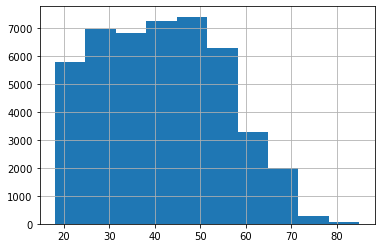

In [12]:
df['Age'].hist()

In [13]:
df.dropna(axis=0, inplace=True)
#df.fillna(df[['Age']].mean(), inplace=True)
#df['Age'] = df['Age'].fillna(df.groupby(['Customer Type', 'Satisfaction'])['Age'].transform('first'))

In the cell above we can see the 3 approaches that we took. Finally the dropping of the missing values was the best performer.

In [14]:
df.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Price                                 0
NewUsed                               0
Category                              0
Product description accuracy          0
Manufacturer sustainability           0
Packaging quality                     0
Additional options                    0
Helpfulness of reviews and ratings    0
Integrity of packaging                0
Ease check-out procedure              0
Relevance of related products         0
Costumer insurance                    0
Shipping delay in days                0
Arrival delay in days                 0
Satisfaction                          0
dtype: int64

We don't have missing values anymore.

Now, we'll change the satisfaction to be 0 for Not Satisfied and 1 for Satisfied.

In [15]:
df['Satisfaction'] = df['Satisfaction'].apply(lambda x: 0 if x == 'Not Satisfied' else 1)

In [16]:
df[['Satisfaction']].head()

,Satisfaction
0,0
1,1
2,1
4,1
5,1


### 1.3 Balancing

0    26207
1    19925
Name: Satisfaction, dtype: int64


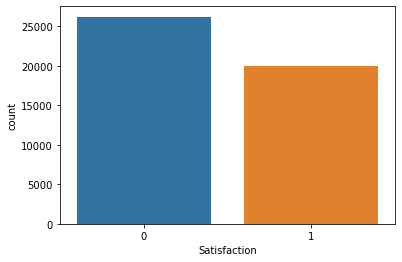

In [17]:
sns.countplot(x=df['Satisfaction'], data=df);
print(df['Satisfaction'].value_counts())

In [18]:
from sklearn.utils import resample


#1) Separate the bigest and smallest
df_majority = df[df['Satisfaction']==0] 
df_minority = df[df['Satisfaction']==1] 

#2) Make downsample
df_majority_downsampled = resample(df_majority, 
                                   replace=False,
                                   n_samples=19925,     
                                   random_state=123)
 
#3) Combine
df = pd.concat([df_majority_downsampled, df_minority])
 
#4) Display new class counts
df['Satisfaction'].value_counts() #"target" is the name of the target column, change it accordingly to your dataset

0    19925
1    19925
Name: Satisfaction, dtype: int64

We can see that we hav more values for 

0    19925
1    19925
Name: Satisfaction, dtype: int64


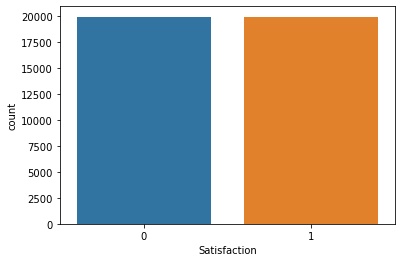

In [19]:
sns.countplot(x=df['Satisfaction'], data=df);
print(df['Satisfaction'].value_counts())

Now we do have a balanced target variable dataset with both classes having 19925 values.

### 1.4 Split categorical and nuemrical

Now let's see how we have to divide our variables into the categories

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39850 entries, 42433 to 49999
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Gender                              39850 non-null  object 
 1   Customer Type                       39850 non-null  object 
 2   Age                                 39850 non-null  float64
 3   Price                               39850 non-null  float64
 4   NewUsed                             39850 non-null  object 
 5   Category                            39850 non-null  object 
 6   Product description accuracy        39850 non-null  int64  
 7   Manufacturer sustainability         39850 non-null  int64  
 8   Packaging quality                   39850 non-null  int64  
 9   Additional options                  39850 non-null  int64  
 10  Helpfulness of reviews and ratings  39850 non-null  int64  
 11  Integrity of packaging              3

In [21]:
df.nunique()

Gender                                    2
Customer Type                             2
Age                                      64
Price                                 21778
NewUsed                                   2
Category                                  5
Product description accuracy              6
Manufacturer sustainability               5
Packaging quality                         6
Additional options                        6
Helpfulness of reviews and ratings        6
Integrity of packaging                    5
Ease check-out procedure                  6
Relevance of related products             6
Costumer insurance                        6
Shipping delay in days                   12
Arrival delay in days                    11
Satisfaction                              2
dtype: int64

Even though some variables are of type integer, we can see that they have only between 5 and 6 unique values. Therefore, we can consider them as categorical.

In [22]:
df_cat = df.select_dtypes(include='object')

In [23]:
df_cat = pd.concat([df_cat, df[['Product description accuracy', 'Manufacturer sustainability', 'Packaging quality', 'Additional options', 'Helpfulness of reviews and ratings', 'Integrity of packaging', 'Ease check-out procedure', 'Relevance of related products', 'Costumer insurance']]], axis=1)

In [24]:
df_cat.head()

,Gender,Customer Type,NewUsed,Category,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance
42433,Male,Not Premium,Used,Sport,3,4,5,3,1,3,4,4,5
23525,Male,Premium,New,Entertainment,4,1,2,2,2,2,4,2,5
14522,Female,Not Premium,New,Entertainment,3,3,5,2,2,2,4,3,5
13981,Male,Premium,New,Technology,1,5,3,1,1,1,1,1,2
48699,Female,Premium,New,Technology,1,1,2,3,4,3,1,3,2


In [25]:
df_num = df[['Price', 'Age', 'Shipping delay in days', 'Arrival delay in days', 'Satisfaction']]

In [26]:
print('We have {} numerial features and {} categorical'.format(df_num.shape[1], df_cat.shape[1]))

We have 5 numerial features and 13 categorical


#### 1.4.1 Categorical Data

Text(0, 0.5, 'Class')

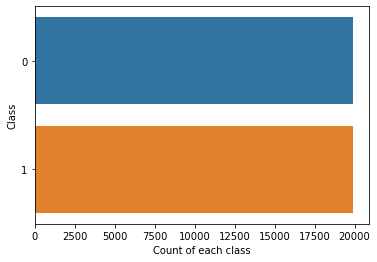

In [27]:
sns.countplot(y=df['Satisfaction'], data=df)
plt.xlabel('Count of each class')
plt.ylabel('Class')

In [28]:
df_0=df_cat[df['Satisfaction']==0]
df_1=df_cat[df['Satisfaction']==1]

In [29]:
df_cat.shape

(39850, 13)

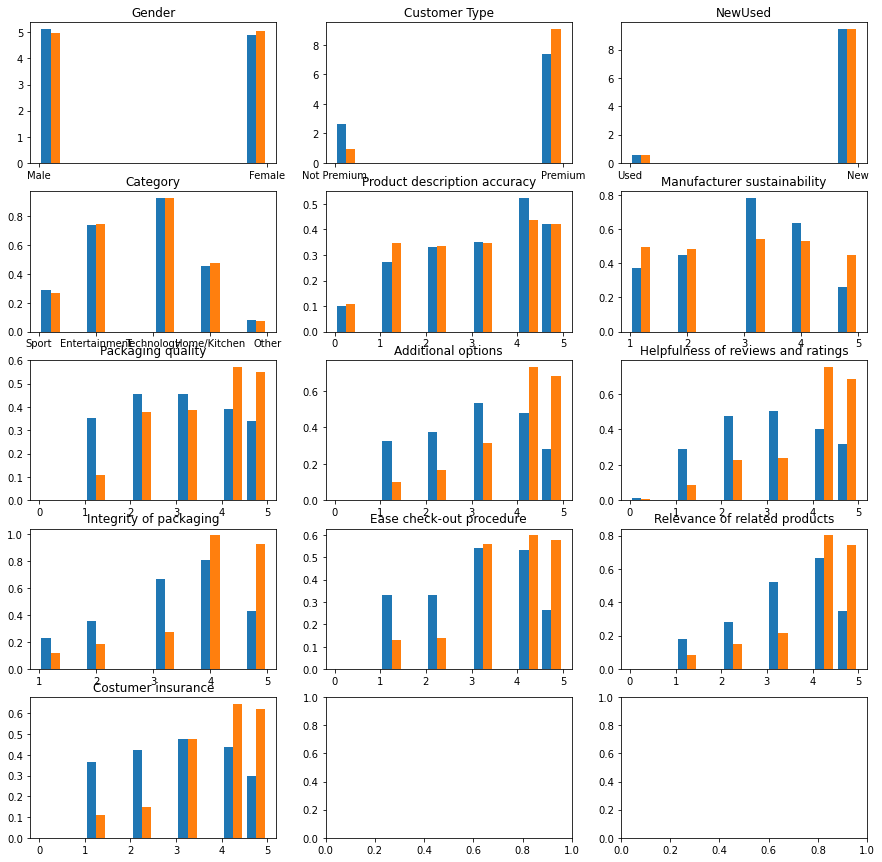

In [30]:
fig, axes = plt.subplots(5, 3,figsize=[15,15])
axes = axes.flatten()
i=0
for x in df_cat.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist([df_0[x],df_1[x]],density=True)
    plt.title(x)
    i+=1
plt.show()

**Insights:**
- Category: doesn't help us predict much
- Customer type: Premium users have a higher rate of satisfaction than not premium users. Good predictor.
- NewUsed: doesn't help predict at all.
- Category: bad predictor.
- Product description accuracy: seems that the higher, the higher disatifaction rate, but not very highly differentiable.
- Manufacture sustaibability: not a clear trend, but could help predict
- Packaging quality: the higher, the better satisfaction. Good predictor.
- Additional options: the higher, the better satisfaction. Good predictor.
- Helpfulness and review of ratings: the higher, the better satisfaction. Good predictor.
- Integrity of packaging: the higher, the better satisfaction. Good predictor.
- Ease check-out procedure: the higher, the better satisfaction. Good predictor.
- Relevance of related products: the higher, the better satisfaction. Good predictor.
- Costumer insurance: the higher, the better satisfaction. Good predictor.

Now let's get the dummies into a DF.

In [31]:
dummies = pd.get_dummies(df_cat, drop_first=True)

In [32]:
dummies.head()

,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Gender_Male,Customer Type_Premium,NewUsed_Used,Category_Home/Kitchen,Category_Other,Category_Sport,Category_Technology
42433,3,4,5,3,1,3,4,4,5,1,0,1,0,0,1,0
23525,4,1,2,2,2,2,4,2,5,1,1,0,0,0,0,0
14522,3,3,5,2,2,2,4,3,5,0,0,0,0,0,0,0
13981,1,5,3,1,1,1,1,1,2,1,1,0,0,0,0,1
48699,1,1,2,3,4,3,1,3,2,0,1,0,0,0,0,1


#### 1.4.2 Numerical Data

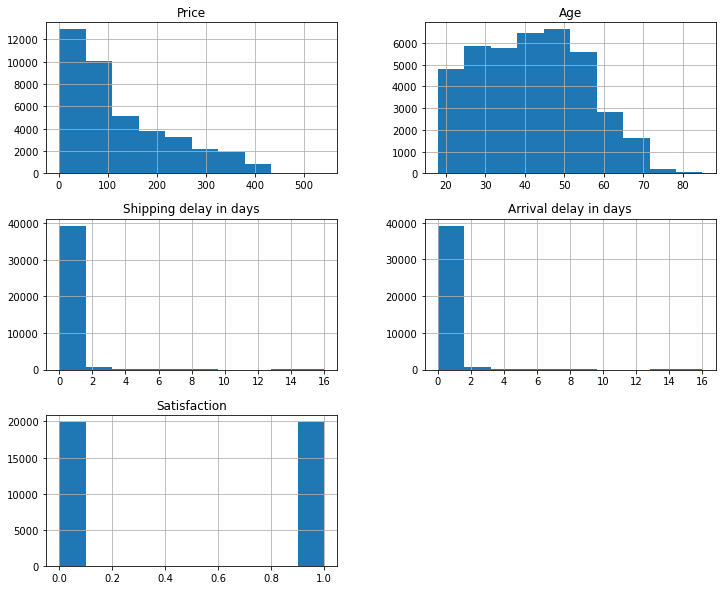

In [33]:
df_num.hist(figsize=(12,10));

Price, Arrival delay in days and Shipping delay in days seem to have exponential distribution.

We should calculate it's log function to see if their histograms improve.

In [34]:
import math
pd.options.mode.chained_assignment = None

df_num['log_price'] = df_num['Price'].apply(lambda x: math.log(x+1))
df_num['log_Arrival delay in days'] = df_num['Arrival delay in days'].apply(lambda x: math.log(x+1))
df_num['log_Shipping delay in days'] = df_num['Shipping delay in days'].apply(lambda x: math.log(x+1))

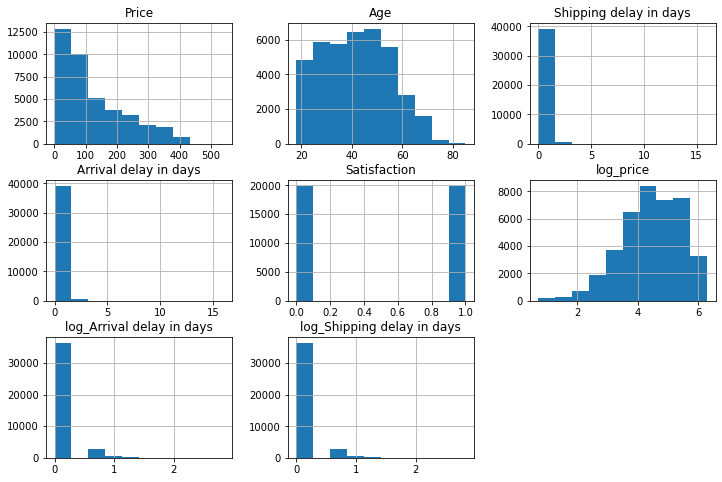

In [385]:
df_num.hist(figsize=(12,8));

Price improved a lot. The other too have improved but not much. We are still gona keep the log of this variables instead of the not logs.

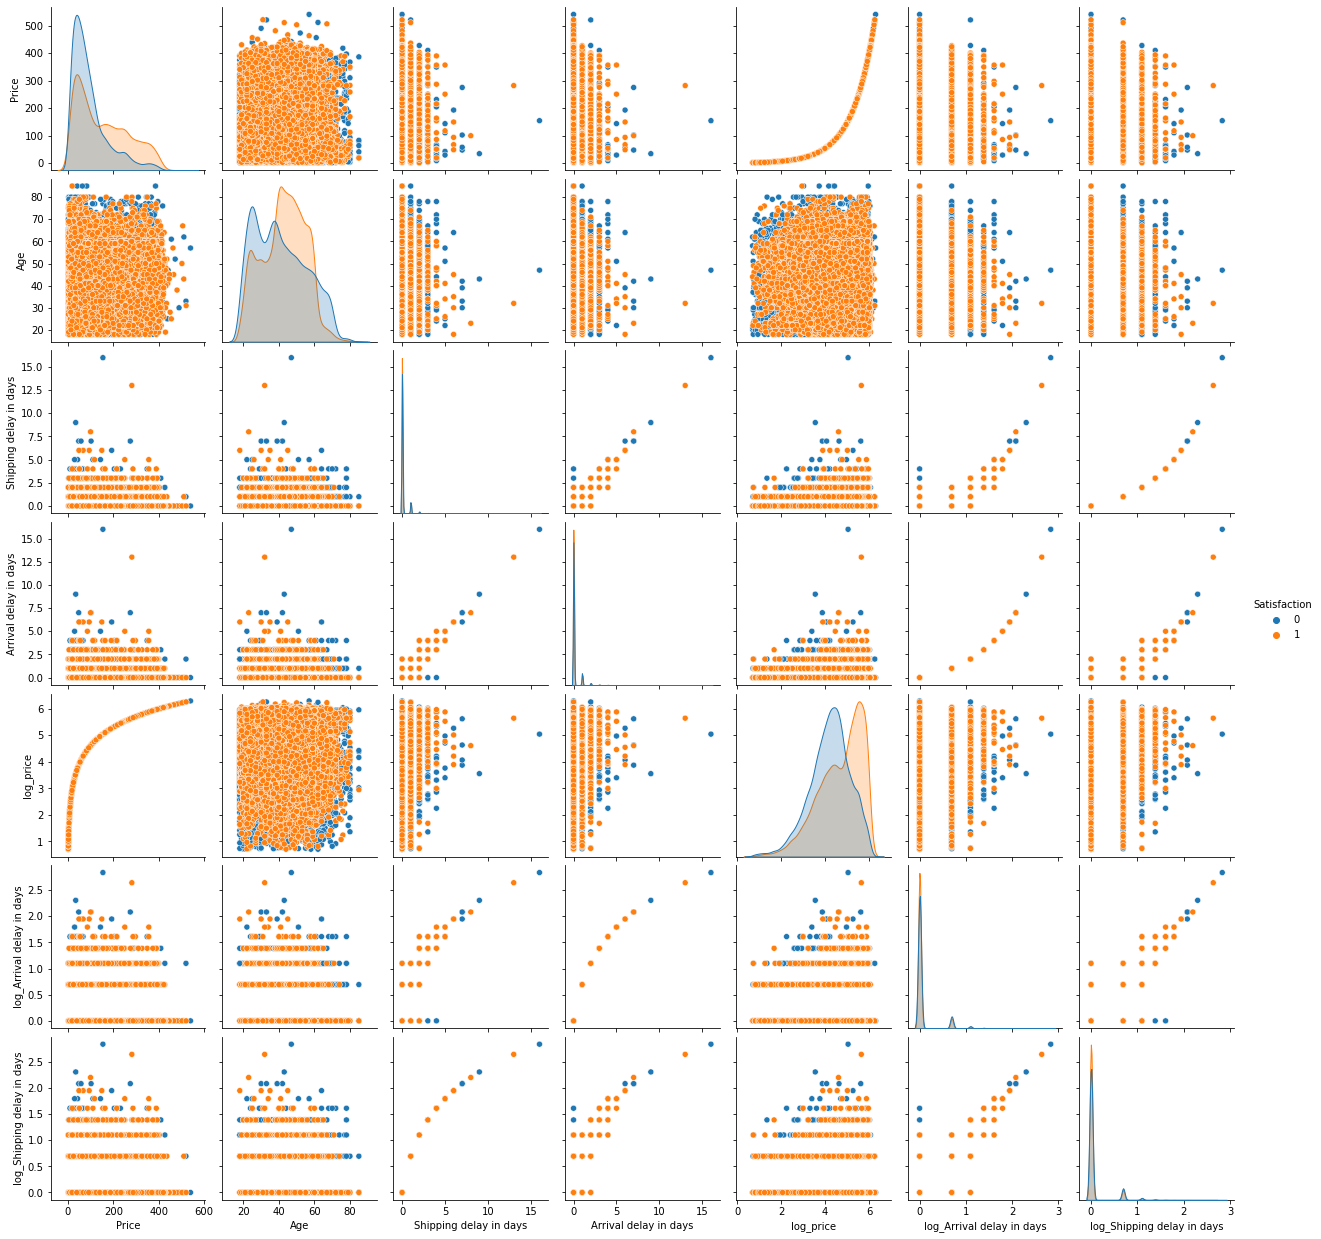

In [99]:
sns.pairplot(df_num, hue='Satisfaction')

There seem to be some variables that help us differentiate bu values the satisfaction of the customers. For example. low Age and High Price, seems to indicate higher satifaction in the customer. 

### 1.5 Standarization


<AxesSubplot:>

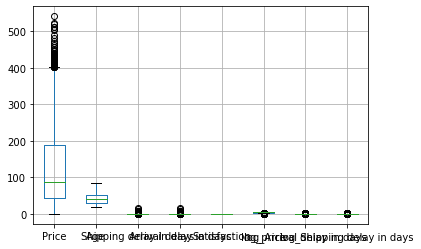

In [35]:
df_num.boxplot()

In [36]:
#dropping satisfaction
df_num.drop('Satisfaction', inplace=True, axis=1)

Yes! Variables are not in the same scale which can affect our model.

(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, 'Price'),
  Text(2, 0, 'Age'),
  Text(3, 0, 'Shipping delay in days'),
  Text(4, 0, 'Arrival delay in days'),
  Text(5, 0, 'log_price'),
  Text(6, 0, 'log_Arrival delay in days'),
  Text(7, 0, 'log_Shipping delay in days')])

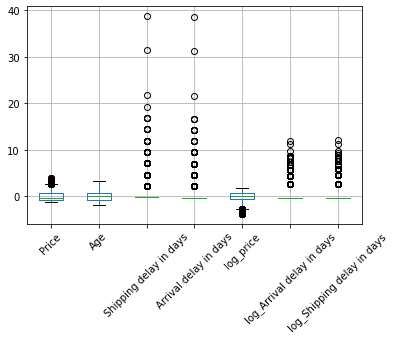

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df_num)
df_num_scaled = pd.DataFrame(scaler.transform(df_num))
df_num_scaled.columns = df_num.columns

df_num_scaled.boxplot()
plt.xticks(rotation=45)

Not it's much better.

In [38]:
df_num_scaled.columns

Index(['Price', 'Age', 'Shipping delay in days', 'Arrival delay in days',
       'log_price', 'log_Arrival delay in days', 'log_Shipping delay in days'],
      dtype='object')

Now we drop the not logarithmic columns.

In [39]:
df_num_scaled.drop(['Price', 'Age', 'Shipping delay in days', 'Arrival delay in days'], axis=1, inplace=True)
df_num_scaled.head()

,log_price,log_Arrival delay in days,log_Shipping delay in days
0,0.286046,-0.296245,-0.293004
1,0.895828,-0.296245,-0.293004
2,-0.873063,-0.296245,-0.293004
3,-0.114662,-0.296245,-0.293004
4,-0.635869,-0.296245,-0.293004


In [40]:
df_num_scaled.set_index(dummies.index,inplace=True)
df_num_scaled.index

Int64Index([42433, 23525, 14522, 13981, 48699, 45845, 48530, 13960, 42958,
            14303,
            ...
            49981, 49982, 49983, 49987, 49988, 49989, 49990, 49992, 49994,
            49999],
           dtype='int64', length=39850)

In [41]:
dummies.columns

Index(['Product description accuracy', 'Manufacturer sustainability',
       'Packaging quality', 'Additional options',
       'Helpfulness of reviews and ratings', 'Integrity of packaging',
       'Ease check-out procedure', 'Relevance of related products',
       'Costumer insurance', 'Gender_Male', 'Customer Type_Premium',
       'NewUsed_Used', 'Category_Home/Kitchen', 'Category_Other',
       'Category_Sport', 'Category_Technology'],
      dtype='object')

In [42]:
print(df_num_scaled.shape)
print(dummies.shape)

(39850, 3)
(39850, 16)


Concatenate both

In [43]:
X = pd.concat([df_num_scaled, dummies], axis=1)
X.head()

,log_price,log_Arrival delay in days,log_Shipping delay in days,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Gender_Male,Customer Type_Premium,NewUsed_Used,Category_Home/Kitchen,Category_Other,Category_Sport,Category_Technology
42433,0.286046,-0.296245,-0.293004,3,4,5,3,1,3,4,4,5,1,0,1,0,0,1,0
23525,0.895828,-0.296245,-0.293004,4,1,2,2,2,2,4,2,5,1,1,0,0,0,0,0
14522,-0.873063,-0.296245,-0.293004,3,3,5,2,2,2,4,3,5,0,0,0,0,0,0,0
13981,-0.114662,-0.296245,-0.293004,1,5,3,1,1,1,1,1,2,1,1,0,0,0,0,1
48699,-0.635869,-0.296245,-0.293004,1,1,2,3,4,3,1,3,2,0,1,0,0,0,0,1


### 2.6 Separate Train/Test

In [44]:
y=df['Satisfaction']

In [45]:
y.shape

(39850,)

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=123)

## 2.0 Modelling
### 2.1 KNN

We are going to do a GridSearch to find the best parameters for the KNN.

In [216]:
import sklearn as sk
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score

In [217]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(11,21,1)}

In [218]:
def search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring='f1', verbose=0, n_jobs=1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))
    
    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    
    print("f1_test: ", f1_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [257]:
search(classifier, parameters)

f1_train: 0.803912 using {'n_neighbors': 13}
f1_test:  0.8054063420551031
[[5061  917]
 [1329 4648]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82      5978
           1       0.84      0.78      0.81      5977

    accuracy                           0.81     11955
   macro avg       0.81      0.81      0.81     11955
weighted avg       0.81      0.81      0.81     11955



In [219]:
model_knn = KNeighborsClassifier(n_neighbors=13)

def roc(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)


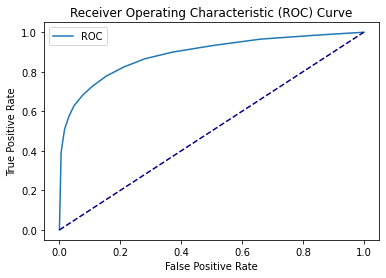

AUC: 0.89


In [208]:

fpr1,tpr1=roc(model_knn,X_train,y_train,X_test,y_test)


Best parameter we could find were 13 Nearest Neighbours.

### 2.2 Decision Tree

Also conduct a GridSearch to find the best possible score.

In [405]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [13, 14, 15],
              'min_samples_split': [81,80,78],
              'min_samples_leaf': [6, 7, 8]}

search(classifier,parameters)

f1_train: 0.823079 using {'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 7, 'min_samples_split': 80}
f1_test:  0.827697536108751
[[5056  922]
 [1106 4871]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      5978
           1       0.84      0.81      0.83      5977

    accuracy                           0.83     11955
   macro avg       0.83      0.83      0.83     11955
weighted avg       0.83      0.83      0.83     11955



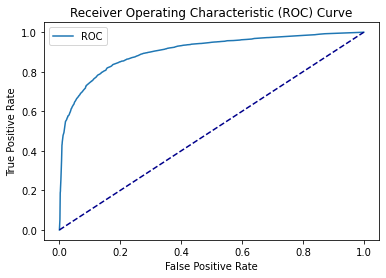

AUC: 0.90


In [406]:
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=14, min_samples_leaf=7, min_samples_split=80)
fpr2,tpr2=roc(model_tree,X_train,y_train,X_test,y_test)


In [407]:
from sklearn import tree
r = tree.export_text(model_tree,feature_names=X_test.columns.tolist(),max_depth=3)
print(r)


|--- Helpfulness of reviews and ratings <= 3.50
|   |--- Costumer insurance <= 3.50
|   |   |--- Product description accuracy <= 0.50
|   |   |   |--- Age <= -1.29
|   |   |   |   |--- truncated branch of depth 4
|   |   |   |--- Age >  -1.29
|   |   |   |   |--- truncated branch of depth 5
|   |   |--- Product description accuracy >  0.50
|   |   |   |--- Ease check-out procedure <= 4.50
|   |   |   |   |--- truncated branch of depth 10
|   |   |   |--- Ease check-out procedure >  4.50
|   |   |   |   |--- truncated branch of depth 8
|   |--- Costumer insurance >  3.50
|   |   |--- log_price <= 0.66
|   |   |   |--- Age <= 1.33
|   |   |   |   |--- truncated branch of depth 10
|   |   |   |--- Age >  1.33
|   |   |   |   |--- truncated branch of depth 7
|   |   |--- log_price >  0.66
|   |   |   |--- Ease check-out procedure <= 2.50
|   |   |   |   |--- truncated branch of depth 4
|   |   |   |--- Ease check-out procedure >  2.50
|   |   |   |   |--- truncated branch of depth 10
|--- 

We got better scores than in the KNN. 

Best params: 'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 7, 'min_samples_split': 80}

### 2.3 Naives Bayes

Now trying with NB model

In [260]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import f1_score
print("f1_score: ", f1_score(y_test, y_pred))

print("f1_test: ", f1_score(y_test, y_pred))


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1_score:  0.7293027871970889
f1_test:  0.7293027871970889
[[4273 1705]
 [1568 4409]]
              precision    recall  f1-score   support

           0       0.73      0.71      0.72      5978
           1       0.72      0.74      0.73      5977

    accuracy                           0.73     11955
   macro avg       0.73      0.73      0.73     11955
weighted avg       0.73      0.73      0.73     11955



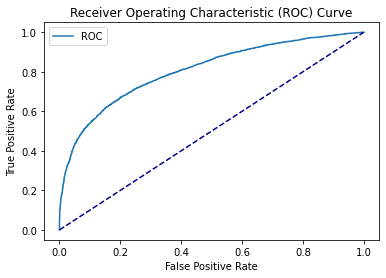

AUC: 0.81


In [261]:
y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr3,tpr3=roc(model,X_train,y_train,X_test,y_test)

Numbers are much worst than before.

### 2.4 Logistic Regression

For this model we can also conduct another gridsearch in order to see which are the best parameters.

In [267]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
parameters = {"C":[0.01, 0.3, 0.4, 0.5 ,0.1,1e-1,1,2, 3], "max_iter":[1000] }


search(classifier,parameters)


f1_train: 0.753223 using {'C': 0.3, 'max_iter': 1000}
f1_test:  0.7509206561767658
[[4493 1485]
 [1491 4486]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      5978
           1       0.75      0.75      0.75      5977

    accuracy                           0.75     11955
   macro avg       0.75      0.75      0.75     11955
weighted avg       0.75      0.75      0.75     11955



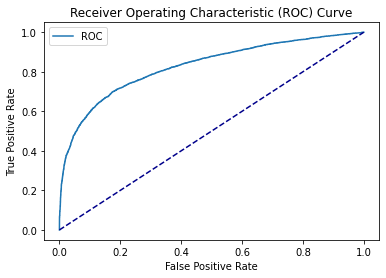

AUC: 0.83


In [270]:
model = LogisticRegression(C=0.3, max_iter=1000)

fpr4,tpr4=roc(model,X_train,y_train,X_test,y_test)

Even though we run with multiple parameters, the numbers were not good.

### 2.5 SVM

Another GridSearch was conducted to find best params.

In [271]:
from sklearn.svm import SVC

In [276]:
classifier = SVC()
parameters = {"kernel":['linear','rbf'], "C":[17, 18, 19, 25]}

search(classifier,parameters)

f1_train: 0.818961 using {'C': 25, 'kernel': 'rbf'}
f1_test:  0.8242224724941523
[[5169  809]
 [1220 4757]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.84      5978
           1       0.85      0.80      0.82      5977

    accuracy                           0.83     11955
   macro avg       0.83      0.83      0.83     11955
weighted avg       0.83      0.83      0.83     11955



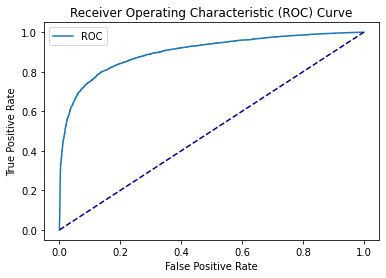

AUC: 0.90


In [277]:
model = SVC(C=25, kernel='rbf',probability=True)
fpr5,tpr5=roc(model,X_train,y_train,X_test,y_test)


Still the Decision Tree is a better model.

### 2.6 MLP Neural Network

Great compuiting power was required. We also conducted a GridSearch to find the best parameters. We tried to go as deep as we could because it was performing good.

In [246]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
#parameters = {"hidden_layer_sizes":[(100,20,5)],  "max_iter": [2000], "alpha": [0.2, 0.3]}
#parameters = {"hidden_layer_sizes":[(100,20,5)],  "max_iter": [2000], "alpha": [0.425, 0.45, 0.475]}
#parameters = {"hidden_layer_sizes":[(75,30,15,5)],  "max_iter": [2000], "alpha": [0.3,0.45, 0.6]}
#parameters = {"hidden_layer_sizes":[(70,30,20,10), (70,35,15,5)],  "max_iter": [2000], "alpha": [0.4, 0.5, 0.60]}
#0.846643
parameters = {"hidden_layer_sizes":[(70,35,15,5)],  "max_iter": [2000], "alpha": [0.55, 0.60, 0.7, 0.8]}



#(100,50,25,5) (alpha=0.45) 0.8425
#(75,30,15,5) (alpha = 0.6) 0.8444
#(60,30,15,5) (alpha=0.5) 0.85069

search(classifier,parameters)

f1_train: 0.841027 using {'alpha': 0.8, 'hidden_layer_sizes': (70, 35, 15, 5), 'max_iter': 2000}
f1_test:  0.8418296089385474
[[5321  657]
 [1155 4822]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      5978
           1       0.88      0.81      0.84      5977

    accuracy                           0.85     11955
   macro avg       0.85      0.85      0.85     11955
weighted avg       0.85      0.85      0.85     11955



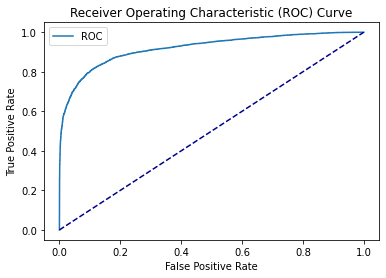

AUC: 0.92


In [220]:
model_MLP=MLPClassifier(hidden_layer_sizes=(60,30, 15, 5), alpha=0.5, max_iter=2000)

fpr6,tpr6=roc(model_MLP,X_train,y_train,X_test,y_test)

Definetly the best until the moment. F1 score and ROC are the highest.

### 2.7 RandomForest

Another GridSeach was conducted to find best parameters.

In [290]:
from sklearn.ensemble import RandomForestClassifier

classifier= RandomForestClassifier()
parameters = {'n_estimators' : [10, 25, 50, 100],
            'criterion' : ['entropy', 'gini'],
             'max_depth' : [8,9,10,12,13,16,17], 
             'min_samples_split' : [15,18,20,22, 25, 27,28,30,35],
              'min_samples_leaf' : [8,9,10,12,13,16,17]
             }

search(classifier,parameters)

f1_train: 0.830903 using {'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 8, 'min_samples_split': 18, 'n_estimators': 100}
f1_test:  0.8301185630861795
[[5344  634]
 [1286 4691]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      5978
           1       0.88      0.78      0.83      5977

    accuracy                           0.84     11955
   macro avg       0.84      0.84      0.84     11955
weighted avg       0.84      0.84      0.84     11955



In [294]:
classifier= RandomForestClassifier()
parameters = {'n_estimators' : [110,120,130],
            'criterion' : ['entropy'],
             'max_depth' : [26,27,28], 
             'min_samples_split' : [20],
              'min_samples_leaf' : [4,5]
             }

search(classifier,parameters)

f1_train: 0.835752 using {'criterion': 'entropy', 'max_depth': 28, 'min_samples_leaf': 4, 'min_samples_split': 20, 'n_estimators': 120}
f1_test:  0.8362645093211395
[[5338  640]
 [1222 4755]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      5978
           1       0.88      0.80      0.84      5977

    accuracy                           0.84     11955
   macro avg       0.85      0.84      0.84     11955
weighted avg       0.85      0.84      0.84     11955



In [298]:
model_RF = RandomForestClassifier(n_estimators = 120, criterion = 'entropy', max_depth = 28, min_samples_leaf=4, min_samples_split=20)

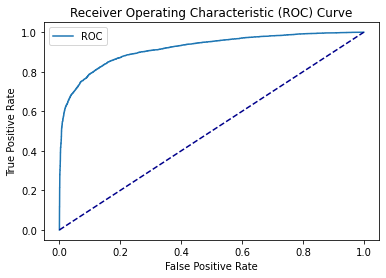

AUC: 0.92


In [299]:
fpr7,tpr7=roc(model_RF,X_train,y_train,X_test,y_test)

Metrics are good, but not as good as the MLP.

### 2.8 ADABoost

In [296]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

classifier= AdaBoostClassifier()
parameters = {'n_estimators' : [2000, 5000],
              'learning_rate' : [0.0001, 0.01, 0.1, 1, 10]}

In [297]:
search(classifier,parameters)

f1_train: 0.765527 using {'learning_rate': 0.1, 'n_estimators': 5000}
f1_test:  0.7629941126997477
[[4601 1377]
 [1441 4536]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      5978
           1       0.77      0.76      0.76      5977

    accuracy                           0.76     11955
   macro avg       0.76      0.76      0.76     11955
weighted avg       0.76      0.76      0.76     11955



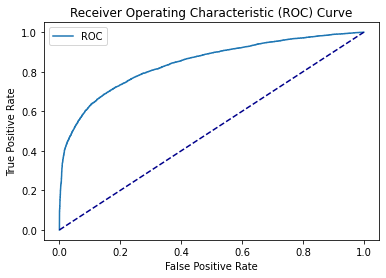

AUC: 0.84


In [300]:
model_ADA = AdaBoostClassifier(learning_rate = 0.1, n_estimators=5000)

fpr8,tpr8=roc(model_ADA,X_train,y_train,X_test,y_test)

## 4. Improving the model
### 4.1 PCA
#### 4.1.1 PCA preproessing

In [408]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

pd.DataFrame(pca.explained_variance_ratio_).transpose()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.183237,0.160116,0.131706,0.116369,0.079473,0.06013,0.049074,0.045525,0.038801,0.02987,...,0.010763,0.008715,0.006196,0.005111,0.004442,0.003306,0.002914,0.002294,0.001187,0.00008


<AxesSubplot:>

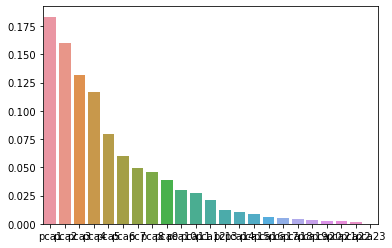

In [410]:
explained = pd.DataFrame(pca.explained_variance_ratio_).transpose()
explained.columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pc7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pc13', 'pca14', 'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21', 'pca22', 'pca23']
sns.barplot(data=explained)

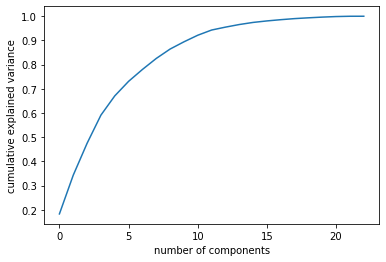

In [411]:
cum_explained_var = np.cumsum(pca.explained_variance_ratio_)
pd.DataFrame(cum_explained_var).transpose()

plt.plot(cum_explained_var)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Not a very clear elbow to identify a change. But we can use the first 5 which explain around 70% of the model.

In [412]:
explained

,pca1,pca2,pca3,pca4,pca5,pca6,pc7,pca8,pca9,pca10,...,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23
0,0.183237,0.160116,0.131706,0.116369,0.079473,0.06013,0.049074,0.045525,0.038801,0.02987,...,0.010763,0.008715,0.006196,0.005111,0.004442,0.003306,0.002914,0.002294,0.001187,0.00008


In [414]:
df_pca = pd.DataFrame(pca.transform(X), index = X.index,columns=['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pc7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pc13', 'pca14', 'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21', 'pca22', 'pca23'])
df_pca
                        

,pca1,pca2,pca3,pca4,pca5,pca6,pc7,pca8,pca9,pca10,...,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23
42433,0.279280,-0.673891,-0.405969,-2.833018,-0.442429,0.659124,1.957558,-0.284866,0.825127,-0.158298,...,-0.491653,0.018227,0.802416,-0.714798,0.264864,0.014019,0.448087,0.941815,0.050154,0.001615
23525,1.930220,-0.924226,0.218284,-1.488860,1.586576,1.983508,-0.495259,1.143697,-1.437771,0.071518,...,-0.458309,0.027827,0.170700,-0.110653,0.035351,0.058833,-0.298946,-0.056624,-0.127630,0.000551
14522,1.478123,-0.872465,0.133366,-3.041996,-1.448703,0.688961,0.645082,-1.194739,-0.598818,0.359639,...,0.522406,0.013236,0.183750,-0.425661,0.430719,0.073832,-0.297882,-0.052201,-0.131746,0.000214
13981,5.564755,-1.619957,-0.084580,-0.697001,0.624697,-1.369823,0.297456,-0.724912,2.205900,0.175826,...,-0.471057,0.003625,-0.114235,0.078928,-0.454662,0.031834,0.079608,-0.062639,0.009952,-0.000291
48699,2.056795,-1.014224,2.401587,1.900691,-0.265005,-1.458402,-1.648488,1.551204,0.156420,-0.231132,...,0.467319,0.001599,-0.123015,-0.055366,-0.146110,0.025124,0.074587,-0.050898,0.007667,-0.001613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49989,-1.898073,-0.242620,0.247963,-0.757447,0.723696,1.148885,1.316516,-0.608808,-0.134779,-0.044133,...,0.535409,-0.013298,-0.560468,0.128159,-0.148021,0.016188,0.173153,-0.053567,0.024817,-0.000160
49990,-1.760687,-0.151389,-2.583295,-0.455365,1.891689,-0.006109,-0.129401,-0.052033,0.597630,-0.063646,...,0.498050,-0.018660,0.179961,0.065650,0.223002,0.058041,-0.299012,-0.056438,-0.134500,-0.000699
49992,-0.943082,-0.277404,-1.059178,-2.338370,-1.907997,0.487730,-1.443855,-2.203514,-0.679231,0.627581,...,0.573979,-0.007638,-0.567490,0.483815,0.005258,-0.007524,0.170346,-0.047817,0.022480,0.000883
49994,-3.305981,0.154129,-2.668779,1.594533,1.435093,0.833927,-0.746692,0.033295,1.101028,-0.269880,...,0.422748,-0.000986,-0.107665,-0.108617,0.067137,0.020191,0.067790,-0.056873,0.011352,0.000283


In [415]:
df_pca['pca1']

42433    0.279280
23525    1.930220
14522    1.478123
13981    5.564755
48699    2.056795
           ...   
49989   -1.898073
49990   -1.760687
49992   -0.943082
49994   -3.305981
49999    3.165873
Name: pca1, Length: 39850, dtype: float64

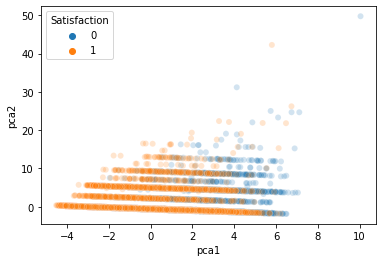

In [416]:
#Plotting just the first two PCAs
sns.scatterplot(x='pca1', y="pca2",
              hue=y, alpha=.2,
              data=df_pca);

We can see that just with the first two PCAs, we can somehow identify a difference between the two groups, but still it's not very clear. If we had to say, lower PCA1 and lower PCA2, the higher the satisfaction.

#### 4.1.2 PCA modelling

In [417]:
X1 = df_pca.iloc[:,:5]
X1

,pca1,pca2,pca3,pca4,pca5
42433,0.279280,-0.673891,-0.405969,-2.833018,-0.442429
23525,1.930220,-0.924226,0.218284,-1.488860,1.586576
14522,1.478123,-0.872465,0.133366,-3.041996,-1.448703
13981,5.564755,-1.619957,-0.084580,-0.697001,0.624697
48699,2.056795,-1.014224,2.401587,1.900691,-0.265005
...,...,...,...,...,...
49989,-1.898073,-0.242620,0.247963,-0.757447,0.723696
49990,-1.760687,-0.151389,-2.583295,-0.455365,1.891689
49992,-0.943082,-0.277404,-1.059178,-2.338370,-1.907997
49994,-3.305981,0.154129,-2.668779,1.594533,1.435093


In [418]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.30, stratify=y, random_state=123)

In [499]:
def search1(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring='f1', verbose=0, n_jobs=1)
    gs = gs.fit(X1_train, y1_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))
    
    best_model = gs.best_estimator_
    y1_pred = best_model.predict(X1_test)
    
    print("f1_test: ", f1_score(y1_test, y1_pred))
    print(confusion_matrix(y1_test, y1_pred))
    print(classification_report(y1_test, y1_pred))

In [498]:
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(10,1000,100)}

In [500]:
search1(classifier, parameters)

f1_train: 0.771760 using {'n_neighbors': 10}
f1_test:  0.7723162324290446
[[5099  879]
 [1664 4313]]
              precision    recall  f1-score   support

           0       0.75      0.85      0.80      5978
           1       0.83      0.72      0.77      5977

    accuracy                           0.79     11955
   macro avg       0.79      0.79      0.79     11955
weighted avg       0.79      0.79      0.79     11955



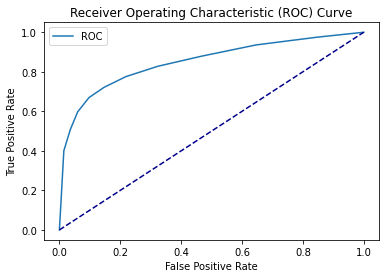

AUC: 0.85


In [501]:
model_knn = KNeighborsClassifier(n_neighbors=10)
fpr5,tpr5=roc(model_knn,X1_train,y1_train,X1_test,y1_test)

Even though we tried to reduce variables, we still got a lower AUC roc and f1 score. We didn't try for all the models, but if it was significantly lower for this, it's probably gonna be the same for other models.

## 5. Comparing models

| Model | F1 train | F1 test | AUC ROC |  |  |
|---|---|---|---|---|---|
| KNN | 0.804 | 0.805 | 0.89 |
| Decision Tree | 0.823 | 0.828 | 0.90 |
| Naives Bayes | 0.729 | 0.729 | 0.81 |
| Logistic Regression | 0.753 | 0.751 | 0.83 |
| SVM | 0.819 | 0.824 | 0.90 |
| MLP | 0.840 | 0.846 | 0.92 |
| Random Forest | 0.830 | 0.830 | 0.92 |
| Ada Boost | 0.765 | 0.763 | 0.84 |

As we can see, for all the models we did, the scores increased. Therefore we conclude that it's better to resample before.

**Let's compare the ROC curves:**

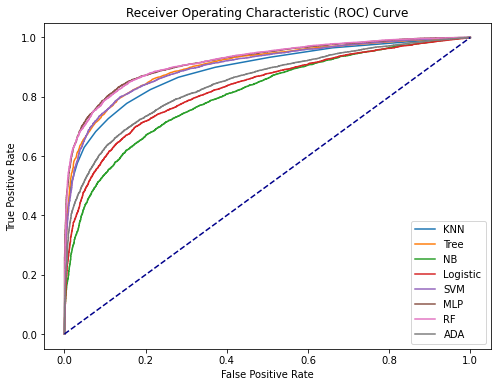

In [305]:
plt.figure(figsize=(8,6))

plt.plot(fpr1, tpr1, label= "KNN")
plt.plot(fpr2, tpr2, label= "Tree")
plt.plot(fpr3, tpr3, label= "NB")
plt.plot(fpr4, tpr4, label= "Logistic")    
plt.plot(fpr5, tpr5, label= "SVM")
plt.plot(fpr6, tpr6, label= "MLP")
plt.plot(fpr7, tpr7, label= "RF")
plt.plot(fpr8, tpr8, label= "ADA")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

We can clearly see how for the ROC curve the MLP and RF are the best peformers.

With this two metrics, we conclude that this two are the best models, but the MLP a little better because of an even higher F1 score.

## 6. Making predictions

In [179]:
df2 = pd.read_csv('prediction.csv')
print('We have {} rows and {} columns'.format(df2.shape[0], df2.shape[1]))

We have 20000 rows and 19 columns


In [180]:
df2.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Price,NewUsed,Category,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days
0,0,928P866c,Male,Premium,37.0,18.71,New,Home/Kitchen,1,1,5,3,5,2,2,5,5,0,0
1,1,728V461t,Female,Premium,49.0,110.89,Used,Technology,4,5,3,2,2,2,3,2,3,0,0
2,2,087W387u,Male,Premium,57.0,84.82,New,Home/Kitchen,2,2,4,2,2,2,4,2,5,0,0
3,3,284H293x,Female,Premium,53.0,65.35,New,Technology,5,1,3,5,5,5,4,4,3,0,0
4,4,947J480l,Female,Premium,56.0,284.60,New,Technology,3,3,4,5,5,5,2,5,1,0,0


In [181]:
df2.drop('id', axis=1, inplace=True)
df2.drop('Unnamed: 0', axis=1, inplace=True)

df2.head()

,Gender,Customer Type,Age,Price,NewUsed,Category,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days
0,Male,Premium,37.0,18.71,New,Home/Kitchen,1,1,5,3,5,2,2,5,5,0,0
1,Female,Premium,49.0,110.89,Used,Technology,4,5,3,2,2,2,3,2,3,0,0
2,Male,Premium,57.0,84.82,New,Home/Kitchen,2,2,4,2,2,2,4,2,5,0,0
3,Female,Premium,53.0,65.35,New,Technology,5,1,3,5,5,5,4,4,3,0,0
4,Female,Premium,56.0,284.60,New,Technology,3,3,4,5,5,5,2,5,1,0,0


### 1.2 Missing values

In [182]:
df2.isnull().sum()

Gender                                   0
Customer Type                            0
Age                                   1552
Price                                    0
NewUsed                                  0
Category                                 0
Product description accuracy             0
Manufacturer sustainability              0
Packaging quality                        0
Additional options                       0
Helpfulness of reviews and ratings       0
Integrity of packaging                   0
Ease check-out procedure                 0
Relevance of related products            0
Costumer insurance                       0
Shipping delay in days                   0
Arrival delay in days                    0
dtype: int64

In [183]:
print(df2['Age'].mean())
print(df2['Age'].median())


41.56933000867303
41.0


In [184]:
#fill by grouping
df2.fillna(df2[['Age']].median(), inplace=True)


In [185]:
df2.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Price                                 0
NewUsed                               0
Category                              0
Product description accuracy          0
Manufacturer sustainability           0
Packaging quality                     0
Additional options                    0
Helpfulness of reviews and ratings    0
Integrity of packaging                0
Ease check-out procedure              0
Relevance of related products         0
Costumer insurance                    0
Shipping delay in days                0
Arrival delay in days                 0
dtype: int64

<AxesSubplot:>

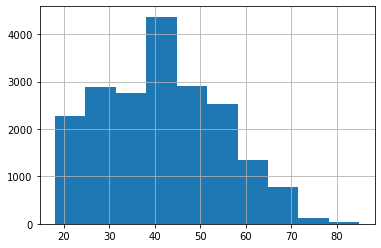

In [186]:
df2['Age'].hist()

### 1.4 Categorial & Numerical

In [188]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Gender                              20000 non-null  object 
 1   Customer Type                       20000 non-null  object 
 2   Age                                 20000 non-null  float64
 3   Price                               20000 non-null  float64
 4   NewUsed                             20000 non-null  object 
 5   Category                            20000 non-null  object 
 6   Product description accuracy        20000 non-null  int64  
 7   Manufacturer sustainability         20000 non-null  int64  
 8   Packaging quality                   20000 non-null  int64  
 9   Additional options                  20000 non-null  int64  
 10  Helpfulness of reviews and ratings  20000 non-null  int64  
 11  Integrity of packaging              20000

#### Categorical

In [189]:
df2_cat = df2.select_dtypes(include='object')
df2_cat = pd.concat([df2_cat, df2[['Product description accuracy', 'Manufacturer sustainability', 'Packaging quality', 'Additional options', 'Helpfulness of reviews and ratings', 'Integrity of packaging', 'Ease check-out procedure', 'Relevance of related products', 'Costumer insurance']]], axis=1)

In [190]:
df2_cat.head()

,Gender,Customer Type,NewUsed,Category,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance
0,Male,Premium,New,Home/Kitchen,1,1,5,3,5,2,2,5,5
1,Female,Premium,Used,Technology,4,5,3,2,2,2,3,2,3
2,Male,Premium,New,Home/Kitchen,2,2,4,2,2,2,4,2,5
3,Female,Premium,New,Technology,5,1,3,5,5,5,4,4,3
4,Female,Premium,New,Technology,3,3,4,5,5,5,2,5,1


#### Numerical

In [191]:
df2_num = df2[['Price', 'Age', 'Shipping delay in days', 'Arrival delay in days']]

In [192]:
print('We have {} numerial features and {} categorical'.format(df2_num.shape[1], df2_cat.shape[1]))


We have 4 numerial features and 13 categorical


#### Dummies

In [193]:
dummies2 = pd.get_dummies(df2_cat, drop_first=True)

In [194]:
dummies2.head()

,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Gender_Male,Customer Type_Premium,NewUsed_Used,Category_Home/Kitchen,Category_Other,Category_Sport,Category_Technology
0,1,1,5,3,5,2,2,5,5,1,1,0,1,0,0,0
1,4,5,3,2,2,2,3,2,3,0,1,1,0,0,0,1
2,2,2,4,2,2,2,4,2,5,1,1,0,1,0,0,0
3,5,1,3,5,5,5,4,4,3,0,1,0,0,0,0,1
4,3,3,4,5,5,5,2,5,1,0,1,0,0,0,0,1


#### Numerical prep

In [195]:
import math
pd.options.mode.chained_assignment = None

df2_num['log_price'] = df2_num['Price'].apply(lambda x: math.log(x+1))
df2_num['log_Arrival delay in days'] = df2_num['Arrival delay in days'].apply(lambda x: math.log(x+1))
df2_num['log_Shipping delay in days'] = df2_num['Shipping delay in days'].apply(lambda x: math.log(x+1))

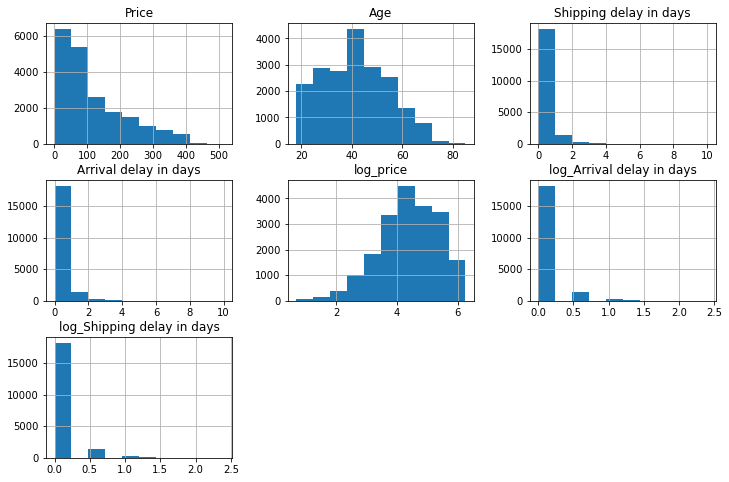

In [196]:
df2_num.hist(figsize=(12,8));

In [197]:
scaled_df2.describe()

,log_price,log_Arrival delay in days,log_Shipping delay in days
count,3.985000e+04,3.985000e+04,3.985000e+04
mean,-3.140051e-16,3.098899e-15,-6.744595e-15
std,1.000013e+00,1.000013e+00,1.000013e+00
min,-3.772479e+00,-2.962446e-01,-2.930036e-01
25%,-6.421299e-01,-2.962446e-01,-2.930036e-01
50%,6.474071e-02,-2.962446e-01,-2.930036e-01
75%,8.128172e-01,-2.962446e-01,-2.930036e-01
max,1.880567e+00,1.199500e+01,1.211732e+01


### Scaling

<AxesSubplot:>

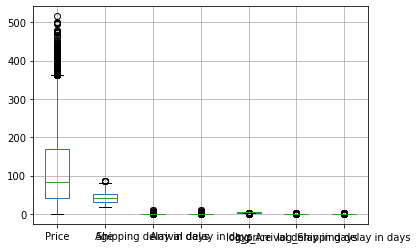

In [198]:
df2_num.boxplot()

In [199]:
scaled_df2 = pd.DataFrame(scaler.transform(df2_num))
scaled_df2.columns = df2_num.columns

In [200]:
scaled_df2.head()

,Price,Age,Shipping delay in days,Arrival delay in days,log_price,log_Arrival delay in days,log_Shipping delay in days
0,-1.027807,-0.354709,-0.261607,-0.265317,-1.469370,-0.296245,-0.293004
1,-0.135849,0.543551,-0.261607,-0.265317,0.286137,-0.296245,-0.293004
2,-0.388109,1.142391,-0.261607,-0.265317,0.017952,-0.296245,-0.293004
3,-0.576506,0.842971,-0.261607,-0.265317,-0.242189,-0.296245,-0.293004
4,1.545015,1.067536,-0.261607,-0.265317,1.233530,-0.296245,-0.293004


(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, 'Price'),
  Text(2, 0, 'Age'),
  Text(3, 0, 'Shipping delay in days'),
  Text(4, 0, 'Arrival delay in days'),
  Text(5, 0, 'log_price'),
  Text(6, 0, 'log_Arrival delay in days'),
  Text(7, 0, 'log_Shipping delay in days')])

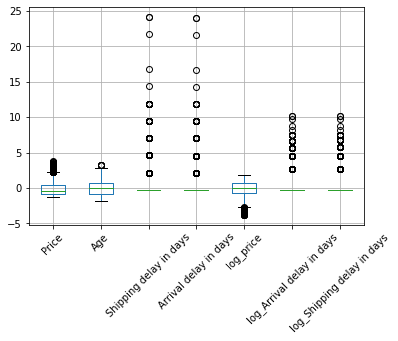

In [201]:
scaled_df2.boxplot()
plt.xticks(rotation=45)

### Dropping and concatenating

In [202]:
scaled_df2.drop(['Price', 'Age', 'Shipping delay in days', 'Arrival delay in days'], axis=1, inplace=True)
scaled_df2.head()

,log_price,log_Arrival delay in days,log_Shipping delay in days
0,-1.469370,-0.296245,-0.293004
1,0.286137,-0.296245,-0.293004
2,0.017952,-0.296245,-0.293004
3,-0.242189,-0.296245,-0.293004
4,1.233530,-0.296245,-0.293004


In [203]:
scaled_df2.set_index(dummies2.index,inplace=True)
scaled_df2.index

RangeIndex(start=0, stop=20000, step=1)

In [204]:
dummies2.columns

Index(['Product description accuracy', 'Manufacturer sustainability',
       'Packaging quality', 'Additional options',
       'Helpfulness of reviews and ratings', 'Integrity of packaging',
       'Ease check-out procedure', 'Relevance of related products',
       'Costumer insurance', 'Gender_Male', 'Customer Type_Premium',
       'NewUsed_Used', 'Category_Home/Kitchen', 'Category_Other',
       'Category_Sport', 'Category_Technology'],
      dtype='object')

In [205]:
print(scaled_df2.shape)
print(dummies2.shape)

(20000, 3)
(20000, 16)


In [206]:
X2 = pd.concat([scaled_df2, dummies2], axis=1)
X2.head()

,log_price,log_Arrival delay in days,log_Shipping delay in days,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Gender_Male,Customer Type_Premium,NewUsed_Used,Category_Home/Kitchen,Category_Other,Category_Sport,Category_Technology
0,-1.469370,-0.296245,-0.293004,1,1,5,3,5,2,2,5,5,1,1,0,1,0,0,0
1,0.286137,-0.296245,-0.293004,4,5,3,2,2,2,3,2,3,0,1,1,0,0,0,1
2,0.017952,-0.296245,-0.293004,2,2,4,2,2,2,4,2,5,1,1,0,1,0,0,0
3,-0.242189,-0.296245,-0.293004,5,1,3,5,5,5,4,4,3,0,1,0,0,0,0,1
4,1.233530,-0.296245,-0.293004,3,3,4,5,5,5,2,5,1,0,1,0,0,0,0,1


In [207]:
X2['default_sat'] = 0
X2.head()

,log_price,log_Arrival delay in days,log_Shipping delay in days,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Gender_Male,Customer Type_Premium,NewUsed_Used,Category_Home/Kitchen,Category_Other,Category_Sport,Category_Technology,default_sat
0,-1.469370,-0.296245,-0.293004,1,1,5,3,5,2,2,5,5,1,1,0,1,0,0,0,0
1,0.286137,-0.296245,-0.293004,4,5,3,2,2,2,3,2,3,0,1,1,0,0,0,1,0
2,0.017952,-0.296245,-0.293004,2,2,4,2,2,2,4,2,5,1,1,0,1,0,0,0,0
3,-0.242189,-0.296245,-0.293004,5,1,3,5,5,5,4,4,3,0,1,0,0,0,0,1,0
4,1.233530,-0.296245,-0.293004,3,3,4,5,5,5,2,5,1,0,1,0,0,0,0,1,0


In [231]:
X2.drop('default_sat',axis=1, inplace=True)

In [225]:

y2_pred = model_MLP.predict(X2)

In [226]:
X2.columns

Index(['log_price', 'log_Arrival delay in days', 'log_Shipping delay in days',
       'Product description accuracy', 'Manufacturer sustainability',
       'Packaging quality', 'Additional options',
       'Helpfulness of reviews and ratings', 'Integrity of packaging',
       'Ease check-out procedure', 'Relevance of related products',
       'Costumer insurance', 'Gender_Male', 'Customer Type_Premium',
       'NewUsed_Used', 'Category_Home/Kitchen', 'Category_Other',
       'Category_Sport', 'Category_Technology'],
      dtype='object')

In [227]:
list(set(X) - set(X2))

[]

In [ ]:
model_MLP=MLPClassifier(hidden_layer_sizes=(60,30, 15, 5), alpha=0.5, max_iter=2000)

model_MLP.fit(X, y)

y2_pred = model_MLP.predict(X2)


#y2 = df2.target
#print("f1_test: ", f1_score(y2, y2_pred))
#print(confusion_matrix(y2, y2_pred))
#print(classification_report(y2, y2_pred))

In [237]:
print(y2_pred)


[1 0 1 ... 0 0 0]


In [239]:
predictions=pd.DataFrame()

predictions['Target']=y2_pred

predictions.head()

,Target
0,1
1,0
2,1
3,0
4,1


In [247]:
predictions.to_csv('Rigone_Iannotta_Bembhy.csv', index=False)

#### Check

Text(0, 0.5, 'Class')

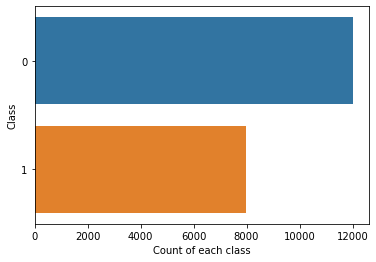

In [242]:
sns.countplot(y=predictions['Target'], data=predictions)
plt.xlabel('Count of each class')
plt.ylabel('Class')